# Training Models

In this chapter we will learn Linear Regression mode. It has two different ways to train:
- Using a direct "closed-form" equation that directly computes the model parameters
- Using an iterative optimization approach called Gradient Descent (GD) that gradually tweaks the model parameters to minimize the cost function.

We will also learn Polynomial Regression, a more complex model that can fit nonlinear datasets.

And finally we will learn two more models for classification tasks: Logistic Regression and Softmax Regression.

# Linear Regression

Equation for Linear Regression model prediction:

$\hat{y} = θ_0 + θ_1x_1 + θ_2x_2 + ⋯ + θ_nx_n$

In this equation:
- $\hat{y}$ is the predicted value
- $n$ is the number of features
- $x_i$ is the $i^{th}$ feature value
- $θ_j$ is the $j^{th}$ model parameter (including the bias term $θ_0$ and the feature weights $θ_1,θ_2,...,θ_n$

This can be written much more concisely using a vectorized form

$\hat{y} = h_θ(x) = θ \cdot x $

In this equation:
- $θ$ is the model's parameter vector, containing the bias term $θ_0$ and the feature weight $θ_1$to $θ_n$
- $x$ is the instance's feature vector, containing $x_0$to $x_n$, with $x_0$ always equal to 1
- $θ \cdot x$ is the dot product of the vectors $θ$ and $x$, which is equal to $θ_0 + θ_1x_1 + θ_2x_2 + ⋯ + θ_nx_n$
- $h_θ$ is the hypothesis function, using the model parameters $θ$

We will use mean square error (MSE) for performance measurement of the model.

$MSE(X, h_θ) = MSE(θ) = \frac{1}{m} \sum_{i=1}^m \biggl(θ^Tx^{(i)}-y^{(i)}\biggr)^2$


## The Normal Equation
The normal equation using mathematical equation to find the value of $θ$ that minimizes the cost function.

$\hat{θ}=(X^TX)^{-1}X^Ty$

In this equation:
- $\hat{θ}$ is the value of $θ$ that minimizes the cost function
- $y$ is the vector of target values containing $y_1$to $y_m$

In [1]:
# let's test the equation
import numpy as np

X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

In [2]:
import matplotlib.pyplot as plt

plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
plt.show()

<Figure size 640x480 with 1 Axes>

Now lets compute $\hat{θ}$

In [3]:
X_b = np.c_[np.ones((100, 1)), X]    # add x0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
theta_best

array([[3.94029535],
       [3.05406146]])

We would hoped for $θ_0=4$ and $θ_1=3$ instead of $θ_0=3.94$ and $θ_1=3.05$. The noise made it impossible to recover the exact parameters.

In [4]:
# we can make prediction with teta cap
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new] # add x0 = 1 to each instance
y_predict = X_new_b.dot(theta_best)
y_predict

array([[ 3.94029535],
       [10.04841827]])

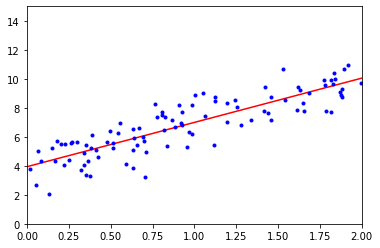

In [5]:
# let's plot this model's predictions
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

In [6]:
# linear regression
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([3.94029535]), array([[3.05406146]]))

In [7]:
lin_reg.predict(X_new)

array([[ 3.94029535],
       [10.04841827]])

In [9]:
# lstq = least squares
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[3.94029535],
       [3.05406146]])

The function $\hat{θ}=X^+y$, where $X^+$ is the *pseudoinverse* of $X$ (the Moore-Penrose inverse).

In [10]:
# we can use pinv()
np.linalg.pinv(X_b).dot(y)

array([[3.94029535],
       [3.05406146]])

The pseudoinverse itself is computed using a standard matrix factorization technique called *Singular Value Decomposition* (SVD) that can decompose the training set matrix X into the matrix multiplication of three matrices $UΣV^T$.

The pseudoinverse is computed as $X^+=VΣ^+U^T$.
- To compute the matrix $Σ^+$, the algorithm takes $Σ$ and sets to zero all values smaller than a tiny threshold value, then it replaces all the nonzero values with their inverse, and finally it transposes the resulting matrix.

This approach is more efficient that computing the Normal Equation.

## Computational Complexity

The Normal Equation computes the inverse of $X^TX$, which is an $(n+1)x(n+1)$ matrix where *n* is the number of features.

The *computational complexity* of inverting such a matrix is typically about $O(n^{2.4})$ to $O(n^3)$, depending on the implementation.

# Gradient Descent
*Gradient Descent* is a generic optimization algorithm capable of finding optimal solution to a wide range of problems. The general idea of Gradient Descent is to tweak parameters iteratively in order to minimize a cost function.

There are two main challenges with Gradient Descent. If the random initialization starts the algorithm in the left, then it will converge to a *local minimum*, which is not as good as the *global minimum*. If it starts on the right, then it will take a very long time to cross the plateau. And if you stop too early, you will never reach the global minimum.

Fortunately, the MSE cost function for a Linear Regression model happens to be a *convex function*, which means that if you pick any two points on the curve, the line segment joining them never crosses the curve. So, there is only one global minimum.

The more parameters a model has, the more dimensions this space has, and the harder the search is.

## Batch Gradient Descent
We need to calculate how much the cost function will change if we change $θ_j$ just a little bit called *partial derivative*.

Partial derivatives of the cost function equation:

$$\frac{∂}{∂θ_j}MSE(θ)=\frac{2}{m}\sum_{i=1}^m (θ^Tx^{(i)}-y^{(i)}) x^{(i)}_j$$

Instead of computing individually, we can compute them all in one go.

$$∇_θMSE(θ)=\frac{2}{m}X^T(Xθ-y)$$

Once you have the gradient vector, which points uphill, just go in the opposite direction to go downhill. This means subtracting $∇_θMSE(θ)$ from $θ$. This is where the learning rate $η$ comes into play: multiply the gradient vector by $η$ to determine the size of the downhill step.

$$θ^{(next \ step)}=θ-η∇_θMSE(θ)$$

In [11]:
# let's implement it
eta = 0.1 # learning rate
n_iterations = 1000
m = 1000

theta = np.random.randn(2,1) # random initialization

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients
    
theta

array([[3.87522936],
       [3.11226667]])

In [14]:
# let's try different learning rate
theta_path_bgd = []

def plot_gradient_descent(theta, eta, theta_path=None):
    m = len(X_b)
    plt.plot(X, y, "b.")
    n_iterations = 1000
    for iteration in range(n_iterations):
        if iteration < 10:
            y_predict = X_new_b.dot(theta)
            style = "b-" if iteration > 0 else "r--"
            plt.plot(X_new, y_predict, style)
        gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
        theta = theta - eta * gradients
        if theta_path is not None:
            theta_path.append(theta)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 2, 0, 15])
    plt.title(r"$\eta = {}$".format(eta), fontsize=16)

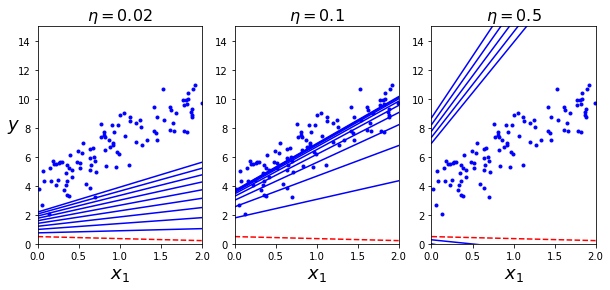

In [15]:
np.random.seed(42)
theta = np.random.randn(2,1)  # random initialization

plt.figure(figsize=(10,4))
plt.subplot(131); plot_gradient_descent(theta, eta=0.02)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(132); plot_gradient_descent(theta, eta=0.1, theta_path=theta_path_bgd)
plt.subplot(133); plot_gradient_descent(theta, eta=0.5)

plt.show()

- On the left, the learning rate is too low: the algorithm will eventually reach the solution, but it will take a long time.
- In the middle, the learning rate looks pretty good: in just a few iterations, it has already converged to the solution.
- On the right, the learning rate is too high: the algorithm diverges, jumping all over the place and actually getting further from the solution at avery step.

Then how to set a good number of iterations?
A simple solution is to set a very large number of iterations but to interrupt the algorithm when the gradient vector becomes tiny, when its norm becomes smaller than a tiny number ϵ (callend *tolerance*)--because this happens when Gradient Descent has (almost) reached the minimum.